In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np
import os

### 1. Download, extract and load CIFAR10 image dataset using torchvision

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [3]:
# Download the training and test datasets
train_dataset = datasets.CIFAR10(
    root='./data',  # Directory to save the dataset
    train=True,  # Download the training dataset
    transform=transform,  # Apply transformations
    download=True  # Download the dataset if not already present
)

test_dataset = datasets.CIFAR10(
    root='./data',
    train=False,  # Download the test dataset
    transform=transform,
    download=True
)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
len(train_dataset)

50000

In [5]:
test_dataset[0][0].shape

torch.Size([3, 32, 32])

In [6]:
batch_size = 64

In [7]:
train_loader = DataLoader(train_dataset,shuffle=True,batch_size=batch_size)
test_loader = DataLoader(test_dataset,shuffle=True)

In [8]:
len(test_loader)

10000

In [9]:
for images, labels in train_loader:
    print(f"Batch size: {images.shape}")
    print(labels)
    break

Batch size: torch.Size([64, 3, 32, 32])
tensor([5, 4, 4, 7, 1, 1, 1, 2, 7, 1, 4, 1, 3, 0, 9, 7, 7, 7, 4, 3, 9, 9, 0, 6,
        9, 6, 4, 0, 2, 0, 6, 0, 7, 5, 6, 3, 5, 7, 1, 7, 0, 6, 5, 0, 8, 7, 0, 4,
        7, 7, 6, 4, 6, 6, 9, 2, 2, 8, 6, 5, 0, 6, 5, 1])


In [10]:
class_names = train_dataset.classes  # or manually define as shown above
print("Class Names:", class_names)

Class Names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [11]:
# cifar10_classes = {
#     0: "Airplane",
#     1: "Automobile",
#     2: "Bird",
#     3: "Cat",
#     4: "Deer",
#     5: "Dog",
#     6: "Frog",
#     7: "Horse",
#     8: "Ship",
#     9: "Truck"
# }

### 2. Show random batches of images in a grid using torchvision.utils.make_grid

In [12]:
data_iter = iter(train_loader)
images, labels = next(data_iter)

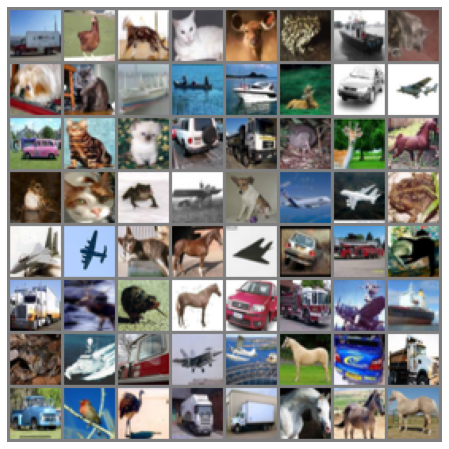

In [13]:
# Make a grid of images
img_grid = make_grid(images)

# Convert the image grid from Tensor to numpy array for display
img_grid = img_grid / 2 + 0.5  # Unnormalize (since we normalized to [-1, 1])
np_img = img_grid.numpy()

# Display the grid of images using matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(np.transpose(np_img, (1, 2, 0)))  # Reorder the dimensions for plt.imshow
plt.axis('off')  # Turn off axis
plt.show()


### 3. Create a convolutional neural network using with nn.Conv2d and nn.MaxPool2d layers

In [14]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=5, stride=2, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128*8*8,512)  # Check the input size here for your dataset
        self.fc2 = nn.Linear(512, 512)
        self.out = nn.Linear(512, 10)
        self.drop_out = nn.Dropout()

    def forward(self, X):
        X = self.conv1(X)
        X = self.conv2(X)
        X = self.pool(X)
        print(X.shape)  # Add this line to inspect the shape before flattening
        X = X.reshape(X.size(0), -1)  # Flatten the tensor
        X = self.drop_out(X)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        out = self.out(X)
        return out

In [15]:
model = NeuralNetwork()

In [16]:
num_epochs = 1  # how many times model will go back and forth
num_classes = 10 # number of labels we should predict
learning_rate = 0.001 #step of learning

In [17]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss() #loss function for defining if we  predicted right or wronge
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # optimisation function for creating gradient decent and learning

### 4. Train a convolutional neural network and visualize the losses and errors

In [18]:
# Train the model
total_step = len(train_loader)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Run the forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)

        if (i + 1) % 100 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Average Loss: {sum(loss_list[-total_step:]) / total_step:.4f}, "
                  f"Average Accuracy: {sum(acc_list[-total_step:]) / total_step * 100:.2f}%")

torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128,

torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
Epoch [1/1], Average Loss: 0.5835, Average Accuracy: 17.48%
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 

torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
Epoch [1/1], Average Loss: 1.0490, Average Accuracy: 39.38%
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 128, 8, 8])
torch.Size([64, 

In [19]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))


torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
torch.Size([1, 128, 8, 8])
t

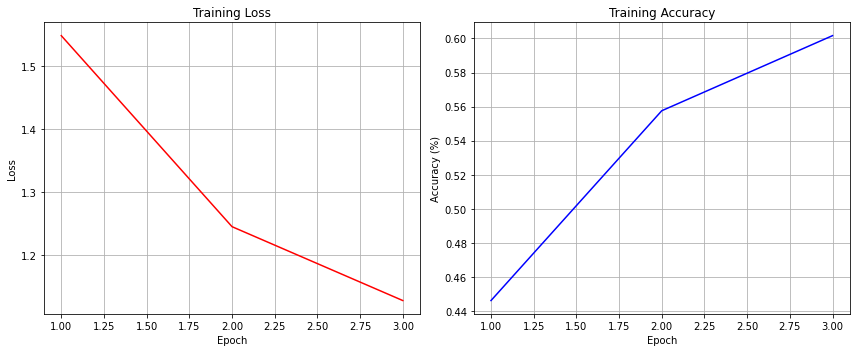

In [20]:
# Assuming these are already defined
num_epochs = 3
batches_per_epoch = len(loss_list) // num_epochs

# Calculate average loss and accuracy per epoch
avg_loss_per_epoch = [
    sum(loss_list[i * batches_per_epoch:(i + 1) * batches_per_epoch]) / batches_per_epoch
    for i in range(num_epochs)
]
avg_acc_per_epoch = [
    sum(acc_list[i * batches_per_epoch:(i + 1) * batches_per_epoch]) / batches_per_epoch
    for i in range(num_epochs)
]

# Plot the data
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), avg_loss_per_epoch, label='Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), avg_acc_per_epoch, label='Accuracy', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()


### Saving the model

In [21]:
torch.save(model.state_dict(), "cifar10_model.pth")
print("Model saved as cifar10_model.pth")

Model saved as cifar10_model.pth


### Generate predictions on single images from the test set

In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [24]:
model.load_state_dict(torch.load("cifar10_model.pth"))
model.to(device)
model.eval()

NeuralNetwork(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(64, 128, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=8192, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (out): Linear(in_features=512, out_features=10, bias=True)
  (drop_out): Dropout(p=0.5, inplace=False)
)

In [26]:
import random

In [27]:
index = random.randint(0, len(test_dataset) - 1)
image, label = test_dataset[index]
print(f"True Label: {test_dataset.classes[label]}")

True Label: automobile


In [28]:
image = image.to(device)
image = image.unsqueeze(0)

In [29]:
with torch.no_grad():
    output = model(image)
    _, predicted = torch.max(output.data, 1)
    predicted_label = test_dataset.classes[predicted.item()]
    print(f"Predicted Label: {predicted_label}")

torch.Size([1, 128, 8, 8])
Predicted Label: automobile


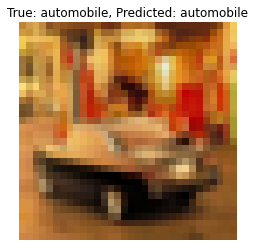

In [30]:
image = image.squeeze(0).cpu()  # Remove batch dimension and move to CPU
image = image / 2 + 0.5  # Unnormalize
image = image.permute(1, 2, 0)  # Change from (C, H, W) to (H, W, C) for matplotlib

plt.imshow(image)
plt.title(f"True: {test_dataset.classes[label]}, Predicted: {predicted_label}")
plt.axis("off")
plt.show()